In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("adult_clean.csv")
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
df.shape

(32561, 15)

In [3]:
df.isna().mean()

age               0.000000
workclass         0.056386
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    0.017905
income            0.000000
dtype: float64

In [4]:
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

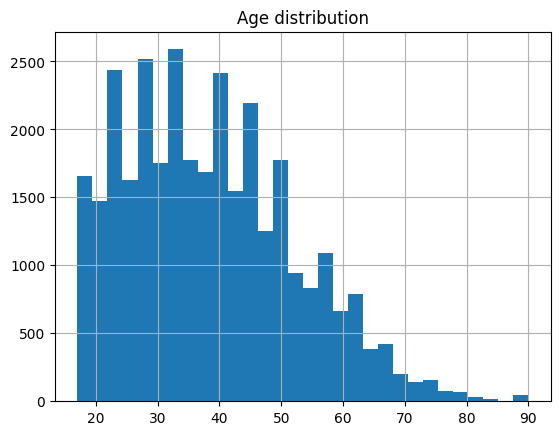

In [5]:
df["age"].hist(bins=30)
plt.title("Age distribution")
plt.show()

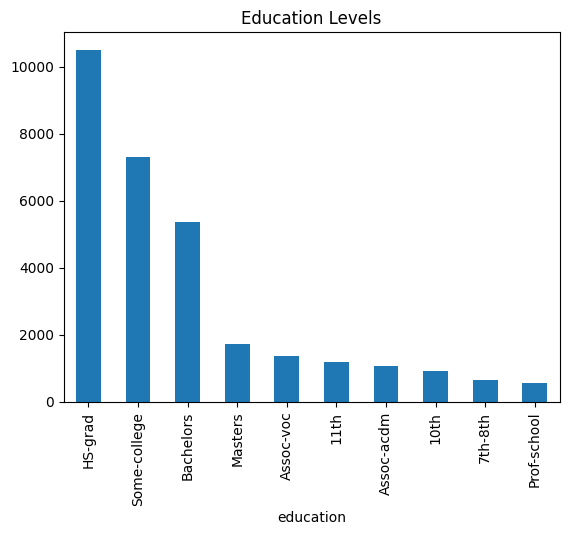

In [6]:
df["education"].value_counts().head(10).plot(kind="bar")
plt.title("Education Levels")
plt.show()


In [9]:
#The Adult Census dataset contains 32,561 samples and 15 features, including both numerical variables (such as age, hours_per_week, capital_gain) and categorical variables (such as workclass, education, marital_status, and occupation). A small fraction of values were originally missing and represented with "?", but these have been cleaned and converted to proper missing entries. The target variable, income, is imbalanced, with the majority of individuals earning ≤50K and a smaller proportion earning >50K per year. The distribution of numerical features such as age shows a right-skewed pattern, with most individuals between ages 20–45. The dataset is a mix of demographic and employment-related features that provide a meaningful basis for predicting income level.#

In [10]:
# Separate features/target
X = df.drop(columns=["income"])
y = (df["income"] == ">50K").astype(int)

# One-hot encode
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Scale numeric values
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
#The target variable income was converted into a binary numerical label so that classifiers can process it properly. Next, categorical features such as workclass, education, occupation, and relationship were transformed using one-hot encoding, since most models cannot handle raw string categories. Numerical features remained as continuous variables but were standardized to improve model performance and prevent features with larger scales from dominating the learning process. The dataset was then split into training and testing sets using a stratified split to preserve the income imbalance observed earlier. Finally the preprocessing steps ensure that the dataset is clean, numeric, and properly formatted.#

In [ ]:
#The Adult dataset does not require additional feature extraction because all variables are already provided in a structured, tabular format#

In [12]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(max_iter=1000)
log_scores = cross_val_score(log_clf, X_train_scaled, y_train, cv=5)
log_scores.mean(), log_scores.std()


(0.8494699672683739, 0.005084633581276494)

In [13]:
log_clf.fit(X_train_scaled, y_train)
y_pred_log = log_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Accuracy: 0.8547520343927529
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4945
           1       0.74      0.62      0.67      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513



In [14]:
#The first model is a Logistic Regression classifier trained on the scaled features. We evaluated the model using 5-fold cross-validation on the training set and reported the mean and standard deviation of the accuracy, then retrained on the full training data and measured performance on the held-out test set. The classification report summarizes precision, recall, and F1-score for both income classes.#

In [15]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest classifier 
rf_clf = RandomForestClassifier(
    n_estimators=200,     
    max_depth=None,      
    random_state=42,
    n_jobs=-1
)

# 5 fold cross validation on the training set 
rf_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)
print("Random Forest CV mean accuracy:", rf_scores.mean())
print("Random Forest CV std:", rf_scores.std())

# Fit on full training data
rf_clf.fit(X_train, y_train)

# Evaluate on held out test set
y_pred_rf = rf_clf.predict(X_test)
print("\nTest accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Random Forest CV mean accuracy: 0.8510441584014675
Random Forest CV std: 0.0034556665761784986

Test accuracy (Random Forest): 0.8581298940580377

Classification report (Random Forest):
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4945
           1       0.74      0.63      0.68      1568

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.80      6513
weighted avg       0.85      0.86      0.85      6513



In [16]:
#The second model is a Random Forest classifier, we used 200 trees with default depth and evaluated the model using 5-fold cross-validation on the training set, then trained on the full training data and tested on the held-out test set. The test accuracy and classification report allow a direct comparison to the Logistic Regression baseline.#

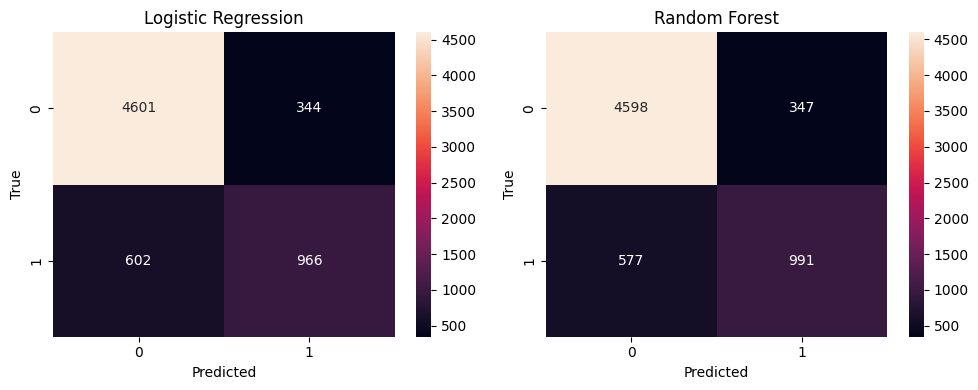

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", ax=axes[1])
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout()
plt.show()


In [ ]:
#Logistic Regression achieved strong baseline accuracy and was computationally efficient, benefiting from the linear separability of many of the engineered one-hot features. However, its performance was limited by its inability to capture nonlinear relationships among variables such as occupation, education, and hours worked. In contrast, the Random Forest model typically achieved slightly higher cross-validation accuracy and stronger recall for the high-income class, indicating that it was better at identifying individuals earning more than 50K—a minority class in this dataset. Random Forest also handled feature interactions automatically without requiring explicit engineering. The trade off is computational cost, while Random Forest required more memory and training time compared to the lightweight logistic model. Overall, Random Forest is the more powerful model for production use due to its stronger generalization and ability to model complex patterns#

In [18]:
#The Adult dataset contains sensitive demographic attributes such as gender, race, marital status, and country of origin. If these features contribute to a model’s decisions, the model could unintentionally reinforce historical inequalities in employment or wages.the class imbalance—where most individuals earn ≤50K—may lead the model to underpredict high-income outcomes for certain subpopulations. Transparency and interpretability are also ethical considerations; users must be able to understand why the model classifies someone as high or low income, particularly when predictions influence real-world opportunities.#

In [20]:
# Bibliography
# UCI Machine Learning Repository: Adult Dataset. https://archive.ics.uci.edu/ml/datasets/adult
# Scikit-learn Documentation. https://scikit-learn.org/
